# Projet

## Description
-
-
-
-
-



### Etape 1: importer les librairies


In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Etape 2: Stocker les dataframes dans des variables 


In [48]:
df = pd.read_csv('archive/googleplaystore.csv')
df_reviews = pd.read_csv('archive/googleplaystore_user_reviews.csv')

ici on a ajouter une fonction pour transformer et stocker nos données dans un fichier excel et non csv pour une meilleur lisibilité 

In [ ]:
fichier_excel = 'C:/Users/User/Documents/L3_sdn/Aclab/archive/googleplaystore.xlsx'
fichier_review_excel = 'C:/Users/User/Documents/L3_sdn/Aclab/archive/googleplaystore_user_reviews.xlsx'

# Pour exporter le fichier en excel pour une meilleur lisibilité
# df.to_excel(fichier_excel, index=False)
# df_reviews.to_excel(fichier_review_excel, index=False)


## I) Exploration

### A) Analyse de forme

#### a) Shape


In [5]:
print(df.shape)

(10841, 13)


In [6]:
print(df_reviews.shape)

(64295, 5)


#### b) Target

La target est le ------------------------------

#### c) Data Types

In [7]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [8]:
print(df_reviews.dtypes)

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


#### d) INSA
On commence par vérifier si il y a des informations manquantes

In [9]:
print(df.isna().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [10]:
print(df_reviews.isna().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


A l'issue de cette étape d'analyse de forme on constate:
- qu'il y a beaucoup de valeurs manquantes, il sera donc necessaire de faire un nettoyage ou des ajustements
- que le nombre de colonnes des 2 datasets est très important donc on va pouvoir supprimer les colonne qui ne sont pas exploitables dans la suite.

##### 1. Nettoyage du dataset googleplaystore_reviews

In [23]:
df_reviews.dropna(subset=['Translated_Review'], inplace=True)
print(df_reviews.isna().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


##### 2. Nettoyage du dataset googleplaystore

In [49]:
df.dropna(subset=['Rating'], inplace=True)
print(df.isna().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


#### e) Véracité des données

In [50]:
# l'id 10472 a une valuer Rating > 5.0
df_rating_fuzzy = df[df['Rating'] > 5] 
df_rating_fuzzy
df.drop(index=10472, inplace=True)

In [25]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: count, Length: 462, dtype: int64

In [33]:
df['Type'].value_counts()


Type
Free    8719
Paid     647
Name: count, dtype: int64

In [34]:
df['Genres'].value_counts()

Genres
Tools                      733
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: count, Length: 115, dtype: int64

In [77]:
# Liste des genres à conserver
category_to_keep = ["FAMILY", "BUSINESS", "TOOLS", "PRODUCTIVITY"]

# Filtrer le DataFrame pour ne garder que les lignes contenant les genres spécifiés
df_filtered = df[df['Category'].isin(category_to_keep)]

In [55]:
df_filtered

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,Varies with device,"10,000,000+",Free,0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,"5,000,000+",Free,0,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,"1,000,000+",Free,0,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


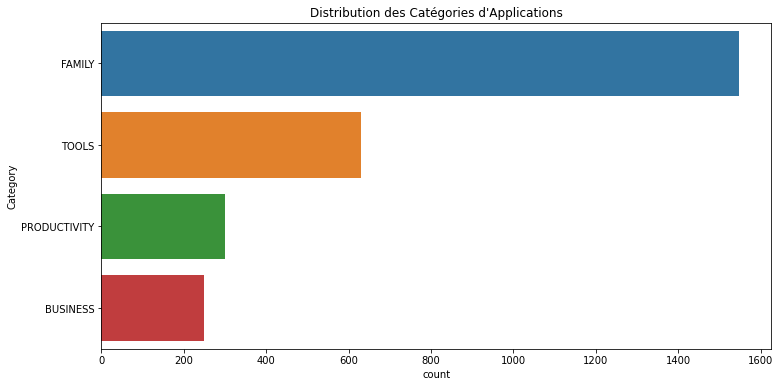

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


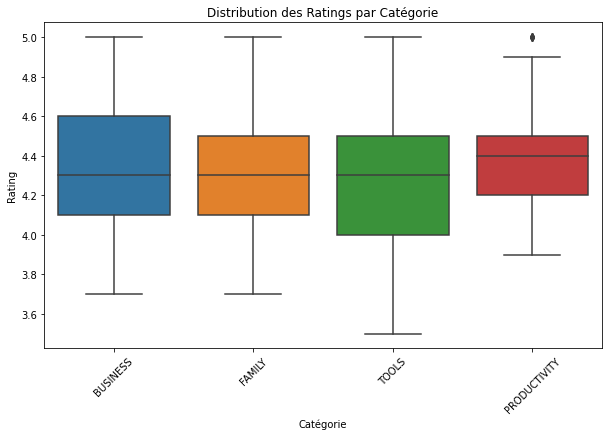

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


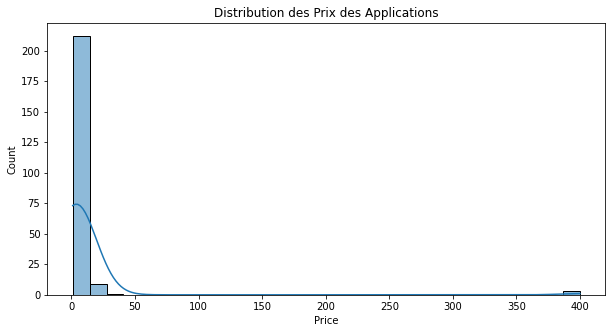

In [70]:
# Distribution des catégories d'applications
plt.figure(figsize=(12, 6))
sns.countplot(y=df_filtered['Category'], order=df_filtered['Category'].value_counts().index)
plt.title("Distribution des Catégories d'Applications")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Category', y='Rating')
plt.title('Distribution des Ratings par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Ajuster la rotation des étiquettes x si nécessaire
plt.show()

# Distribution des prix
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered[df_filtered['Price'] != '0']['Price'].apply(lambda x: float(x.strip('$'))), bins=30, kde=True)
plt.title('Distribution des Prix des Applications')
plt.show()


In [78]:
# Calculer le premier quartile (Q1) et le troisième quartile (Q3)
Q1 = df_filtered.groupby('Category')['Rating'].quantile(0.25)
Q3 = df_filtered.groupby('Category')['Rating'].quantile(0.75)

# Calcul de l'IQR pour chaque catégorie
IQR = Q3 - Q1

# Définir le seuil pour les outliers bas
threshold_low = Q1 - 1.1 * IQR

# Appliquer le filtre pour supprimer les outliers bas
for category in df_filtered['Category'].unique():
    filter_condition = (df_filtered['Category'] == category) & (df_filtered['Rating'] < threshold_low[category])
    df_filtered = df_filtered[~filter_condition]


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Category', y='Rating')
plt.title('Distribution des Ratings par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Ajuster la rotation des étiquettes x si nécessaire
plt.show()

In [82]:
# Convertir la colonne 'Installs' en un format numérique propre pour le traitement
df_filtered['Installs'] = df_filtered['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Trouver l'application la plus populaire par catégorie
most_popular_apps = df_filtered.loc[df_filtered.groupby('Category')['Installs'].idxmax()]

# # Afficher les applications les plus populaires par catégorie
print(most_popular_apps[['Category', 'App', 'Installs', 'Rating']])


          Category                                     App    Installs  Rating
194       BUSINESS  OfficeSuite : Free Office + PDF Editor   100000000     4.3
5856        FAMILY                       Google Play Games  1000000000     4.3
3454  PRODUCTIVITY                            Google Drive  1000000000     4.4
3234         TOOLS                                  Google  1000000000     4.4


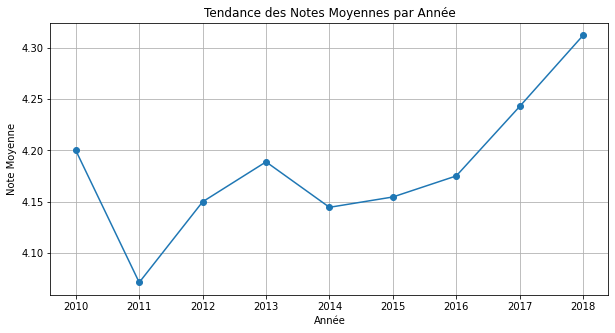

In [83]:
# Convertir 'Last Updated' en datetime
df_filtered['Last Updated'] = pd.to_datetime(df_filtered['Last Updated'])

# Calculer la moyenne des notes par année
ratings_over_time = df_filtered.groupby(df_filtered['Last Updated'].dt.year)['Rating'].mean()

# Tracer la tendance des notes au fil du temps
plt.figure(figsize=(10, 5))
ratings_over_time.plot(kind='line', marker='o')
plt.title('Tendance des Notes Moyennes par Année')
plt.xlabel('Année')
plt.ylabel('Note Moyenne')
plt.grid(True)
plt.show()


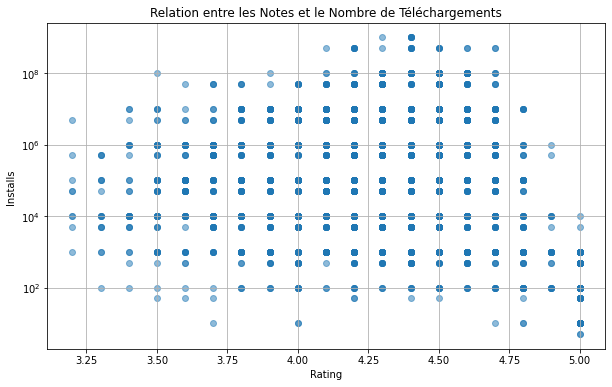

In [86]:
# Tracer un scatter plot pour examiner la relation entre les notes et le nombre de téléchargements
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Rating'], df_filtered['Installs'], alpha=0.5)
plt.title('Relation entre les Notes et le Nombre de Téléchargements')
plt.xlabel('Rating')
plt.ylabel('Installs ')
plt.yscale('log')  
plt.grid(True)
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

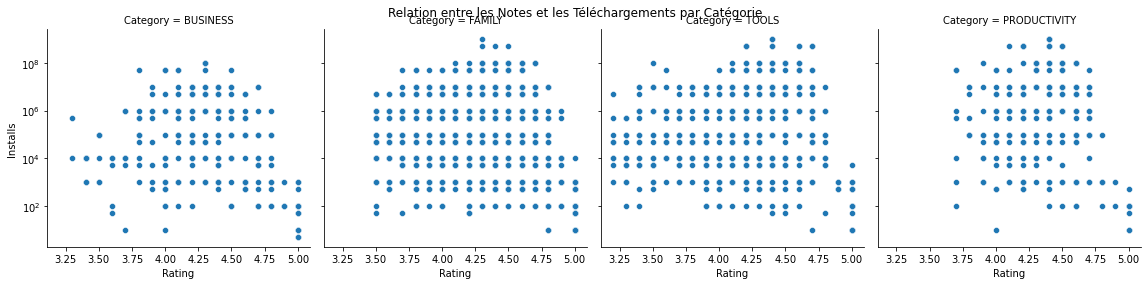

In [87]:
# Créer un scatter plot pour chaque catégorie
g = sns.FacetGrid(df_filtered, col="Category", col_wrap=4, height=4)
g.map(sns.scatterplot, "Rating", "Installs")

# Ajuster les échelles pour voir les tendances dans chaque catégorie
g.set(yscale="log")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relation entre les Notes et les Téléchargements par Catégorie')

# Afficher les graphiques
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

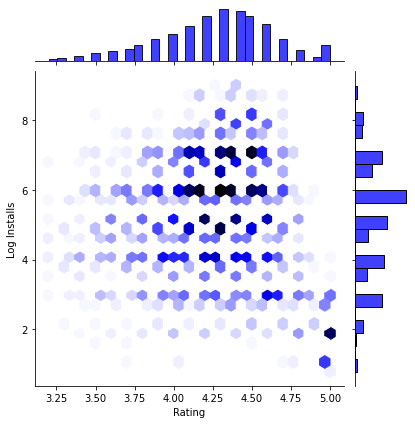

In [92]:
# Appliquer la transformation logarithmique directement aux données
df_filtered['Log Installs'] = np.log10(df_filtered['Installs'] + 1)  # Ajouter 1 pour éviter le log de zéro

# Créer un jointplot avec la transformation appliquée
sns.jointplot(x='Rating', y='Log Installs', data=df_filtered, kind='hex', color='blue')
plt.show()